In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import scipy 
import ast

In [2]:
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df["job_posted_date"]=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Cornelius\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Sat Aug  3 02:06:02 2024).


In [8]:
df_DA_us=df[(df['job_title_short']=="Data Analyst") & (df["job_country"]=="United States")]
df_DA_us.dropna(subset="salary_year_avg",inplace=True)

C:\Users\Cornelius\AppData\Local\Temp\ipykernel_256\908786246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_us.dropna(subset="salary_year_avg",inplace=True)


In [9]:
df_DA_us['salary_year_avg'].sample(10)

476059     90000.00000
1684      120000.00000
406723     58448.00000
703017     95700.00000
210970    120000.00000
547013     85000.00000
523785    125000.00000
758567     77334.90625
351016     40000.00000
773696    119550.00000
Name: salary_year_avg, dtype: float64

<Axes: >

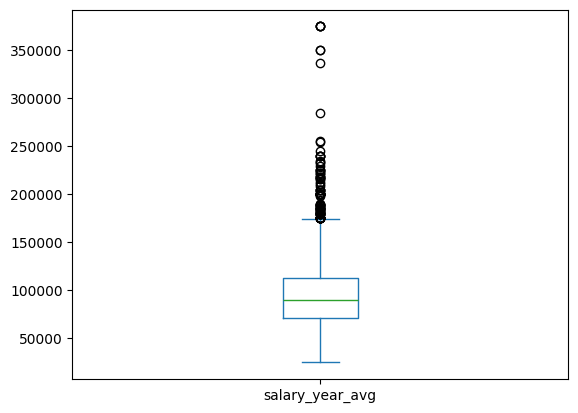

In [11]:
df_DA_us['salary_year_avg'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x1e450a91eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e450a92270>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e450a91c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1e450a92810>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e450a92ae0>],
 'means': []}

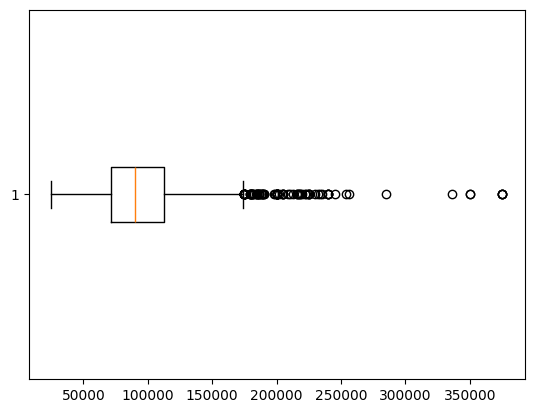

In [13]:
plt.boxplot(df_DA_us['salary_year_avg'],vert=False)

In [47]:
job_titles=['Data Analyst', "Data Engineer",'Data Scientist']
df_us=df[(df['job_title_short'].isin(job_titles))&(df["job_country"]=="United States")]
#plt.boxplot(job_list,labels=job_titles,vert=False )

In [48]:
df_us['job_title_short'].value_counts()

job_title_short
Data Analyst      67816
Data Scientist    58830
Data Engineer     35080
Name: count, dtype: int64

In [49]:
df_us['salary_year_avg']

3              NaN
5              NaN
9              NaN
11             NaN
17             NaN
            ...   
785673         NaN
785685         NaN
785692    157500.0
785703         NaN
785705         NaN
Name: salary_year_avg, Length: 161726, dtype: float64

In [50]:
df_us.dropna(subset=['salary_year_avg'],inplace=True)

C:\Users\Cornelius\AppData\Local\Temp\ipykernel_256\970232304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us.dropna(subset=['salary_year_avg'],inplace=True)


In [51]:
df_us['salary_year_avg']

92        120000.0
100       228222.0
109        89000.0
116       114000.0
146       129500.0
            ...   
785563    136400.0
785624    139216.0
785641    150000.0
785648    221875.0
785692    157500.0
Name: salary_year_avg, Length: 11818, dtype: float64

In [44]:
job_list=[df_us[df_us['job_title_short']=='job_titles']['salary_year_avg'] for x in job_titles ]

In [45]:
job_list[0]

Series([], Name: salary_year_avg, dtype: float64)

C:\Users\Cornelius\AppData\Local\Temp\ipykernel_256\414311272.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list,labels=job_titles,vert=False )


{'whiskers': [<matplotlib.lines.Line2D at 0x1e467a7f8c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e467a7d250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e467a7ec00>,
 'medians': [<matplotlib.lines.Line2D at 0x1e467a7d3a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e467a7e810>,
 'means': []}

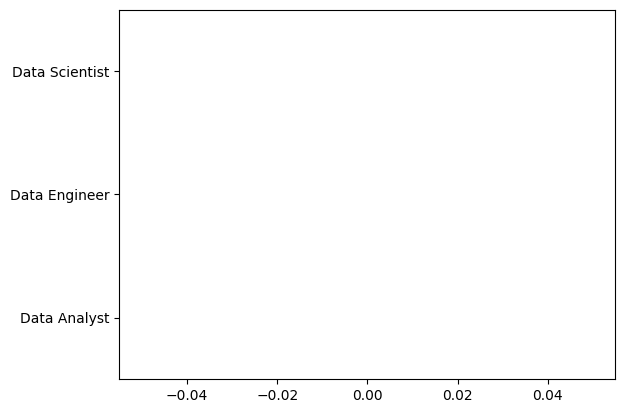

In [46]:
plt.boxplot(job_list,labels=job_titles,vert=False )